In [71]:
#Importing all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

In [72]:
#Importing the dataset
#replace the path with DASS dataset
df_dass = pd.read_csv("path/to/DASS_data.csv", sep="\t", engine="python")

In [73]:
#Checking the dataset
df_dass.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [74]:
#Using describe to get an understanding of the data for all the columns
df_dass.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


Understanding the data -

The following items were included in the survey:

Q1 I found myself getting upset by quite trivial things.
Q2 I was aware of dryness of my mouth.
Q3 I couldn't seem to experience any positive feeling at all.
Q4 I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion).
Q5 I just couldn't seem to get going.
Q6 I tended to over-react to situations.
Q7 I had a feeling of shakiness (eg, legs going to give way).
Q8 I found it difficult to relax.
Q9 I found myself in situations that made me so anxious I was most relieved when they ended.
Q10 I felt that I had nothing to look forward to.
Q11 I found myself getting upset rather easily.
Q12 I felt that I was using a lot of nervous energy.
Q13 I felt sad and depressed.
Q14 I found myself getting impatient when I was delayed in any way (eg, elevators, traffic lights, being kept waiting).
Q15 I had a feeling of faintness.
Q16 I felt that I had lost interest in just about everything.
Q17 I felt I wasn't worth much as a person.
Q18 I felt that I was rather touchy.
Q19 I perspired noticeably (eg, hands sweaty) in the absence of high temperatures or physical exertion.
Q20 I felt scared without any good reason.
Q21 I felt that life wasn't worthwhile.
Q22 I found it hard to wind down.
Q23 I had difficulty in swallowing.
Q24 I couldn't seem to get any enjoyment out of the things I did.
Q25 I was aware of the action of my heart in the absence of physical exertion (eg, sense of heart rate increase, heart missing a beat).
Q26 I felt down-hearted and blue.
Q27 I found that I was very irritable.
Q28 I felt I was close to panic.
Q29 I found it hard to calm down after something upset me.
Q30 I feared that I would be "thrown" by some trivial but unfamiliar task.
Q31 I was unable to become enthusiastic about anything.
Q32 I found it difficult to tolerate interruptions to what I was doing.
Q33 I was in a state of nervous tension.
Q34 I felt I was pretty worthless.
Q35 I was intolerant of anything that kept me from getting on with what I was doing.
Q36 I felt terrified.
Q37 I could see nothing in the future to be hopeful about.
Q38 I felt that life was meaningless.
Q39 I found myself getting agitated.
Q40 I was worried about situations in which I might panic and make a fool of myself.
Q41 I experienced trembling (eg, in the hands).
Q42 I found it difficult to work up the initiative to do things.

Each item was presented one at a time in a random order for each new participant along with a 4 point rating scale asking the user to indicate how often that had been true of them in the past week where

1 = Did not apply to me at all
2 = Applied to me to some degree, or some of the time
3 = Applied to me to a considerable degree, or a good part of the time
4 = Applied to me very much, or most of the time

In [75]:
df_dass.isnull().T.any().T.sum()

np.int64(11431)

In [76]:
#Checking for null values in every column
na_check = df_dass.isnull().sum(axis = 0).sort_values(ascending = False)
na_check

,0
major,11430
country,2
Q1A,0
Q1I,0
Q2I,0
...,...
religion,0
race,0
voted,0
married,0


Only the major column has 11407 null values out of the 39700 rows of data. This accounts for almost 30% of the columns, it's ideal to remove this column from the data for handling the null values

In [77]:
df_dass = df_dass.drop('major',axis=1)

In [78]:
#Checking for null values in every column
na_check = df_dass.isnull().sum(axis = 0).sort_values(ascending = False)
na_check

,0
country,2
Q1I,0
Q1A,0
Q2A,0
Q2I,0
...,...
orientation,0
race,0
voted,0
married,0


In [79]:
#We have 2 records with null values in the country column. As the number of records is very low, we can drop the 2 records from the data \
df_dass = df_dass.dropna()

In [80]:
#Filtering  the necessary columns from the dataframe as the columns like Q1E and Q1I are the response times from the survey, which might not be as useful as the survey responses


df_dass_filtered = df_dass[['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A','Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A',
                            'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A', 'Q21A','Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
                            'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A','Q36A', 'Q37A', 'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A',
                           'country','source','introelapse','testelapse','surveyelapse','TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6',
                            'TIPI7','TIPI8','TIPI9','TIPI10','VCL1','VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6','VCL7','VCL8', 'VCL9', 'VCL10',
                            'VCL11','VCL12','VCL13','VCL14','VCL15','VCL16', 'education','urban', 'gender', 'engnat', 'age','screensize',
                            'uniquenetworklocation','hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize']]





In [81]:
#Separating the the dataset for the resposnse times for each question by dropping the remaining columns
df_time = df_dass.drop(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A','Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A',
                            'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A', 'Q21A','Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
                            'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A','Q36A', 'Q37A', 'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A',
                           'country','source','introelapse','testelapse','surveyelapse','TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6',
                            'TIPI7','TIPI8','TIPI9','TIPI10','VCL1','VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6','VCL7','VCL8', 'VCL9', 'VCL10',
                            'VCL11','VCL12','VCL13','VCL14','VCL15','VCL16', 'education','urban', 'gender', 'engnat', 'age','screensize',
                            'uniquenetworklocation','hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize'], axis=1)


In [82]:
#This dataframe contains the response times for the survey questions
df_time.head(5)

,Q1I,Q1E,Q2I,Q2E,Q3I,Q3E,Q4I,Q4E,Q5I,Q5E,...,Q38I,Q38E,Q39I,Q39E,Q40I,Q40E,Q41I,Q41E,Q42I,Q42E
0,28,3890,25,2122,16,1944,8,2044,34,2153,...,9,5265,19,1892,22,4228,32,1574,15,2969
1,2,8118,36,2890,35,4777,28,3090,10,5078,...,30,3755,42,2323,24,5713,8,1334,29,5562
2,7,5784,33,4373,41,3242,13,6470,11,3927,...,42,1883,35,5790,14,4432,20,2203,31,5768
3,23,5081,11,6837,37,5521,27,4556,28,3269,...,13,4112,42,2769,33,4432,30,3643,36,3698
4,36,3215,13,7731,5,4156,10,2802,2,5628,...,21,10694,41,3231,12,3604,28,1950,6,6265


In [83]:
#Decoding the data based on the categorical values for the EDA
# The description or the original meaning for the values has been taken from the data dictionary

data_encoding = {"education":{ 1:"Less than high school", 2 : "High school", 3:"Univeristy degree", 4 : "Graduate degree" },
                 "urban":{ 1 : "Rural", 2 : "Suburban", 3 : "Urban"},
                 "gender":{0: "Other", 1 : "Male", 2 : "Female", 3 : "Other"},
                 "engnat":{ 1 : "Yes", 2 : "No"},
                 "hand":{ 1 : "Right", 2 : "Left", 3 : "Both"},
                 "orientation":{0 : "Other", 1:"Heterosexual", 2 : "Bisexual", 3:"Homosexual", 4 : "Asexual", 5 : "Other" },
                 "race":{ 10 :"Asian", 20 : "Arab", 30 :"Black", 40 : "Indigenous Australian", 50 : "Native American", 60 : "White", 70 : "Other"},
                 "voted":{ 1 : "Yes", 2 : "No"},
                 "married":{ 1 : "Never married", 2 : "Currently married", 3 : "Previously married"},
                 "religion":{1: "Agnostic", 2: "Atheist", 3: "Buddhist", 4: "Christian(Catholic)", 5: "Christian(Mormon)", 6: "Christian(Protestant)", 7: "Christian(Other)", 8: "Hindu", 9: "Jewish", 10: "Muslim", 11: "Sikh", 12: "Other"}}


df_eda = df_dass_filtered
df_eda = df_eda.replace(data_encoding)
df_eda.head()


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,16,1,1,Right,Other,Heterosexual,Asian,No,Never married,2
1,4,1,2,3,4,4,3,4,3,2,...,16,2,1,Left,Christian(Other),Other,Other,No,Never married,4
2,3,1,4,1,4,3,1,3,2,4,...,17,2,1,Right,Christian(Catholic),Homosexual,White,Yes,Never married,3
3,2,3,2,1,3,3,4,2,3,3,...,13,2,1,Left,Christian(Catholic),Other,Other,No,Never married,5
4,2,2,3,4,4,2,4,4,4,3,...,19,2,2,Both,Muslim,Heterosexual,Asian,No,Never married,4


In [84]:
df_eda.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country', 'source',
       'introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize',
       'uniquenetworklocation', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize'],
      dtype='object')

In [85]:
#Grouping the age into different age groups for clear data analysis

age_group = [
    'below 20',
    '20 to 24',
    '25 to 29',
    '30 to 34',
    '35 to 39',
    '40 to 49',
    '50 to 59',
    'above 60',
]

def label_age(row):
    if row['age'] < 20:
        return age_group[0]
    elif row['age'] < 25:
        return age_group[1]
    elif row['age'] < 30:
        return age_group[2]
    elif row['age'] < 35:
        return age_group[3]
    elif row['age'] < 40:
        return age_group[4]
    elif row['age'] < 50:
        return age_group[5]
    elif row['age'] < 60:
        return age_group[6]
    elif row['age'] > 60:
        return age_group[7]

df_eda['age_group'] = df_eda.apply(lambda row: label_age(row), axis=1)
df_eda.head(2)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,age_group
0,4,4,2,4,4,4,4,4,2,1,...,1,1,Right,Other,Heterosexual,Asian,No,Never married,2,below 20
1,4,1,2,3,4,4,3,4,3,2,...,2,1,Left,Christian(Other),Other,Other,No,Never married,4,below 20


<Axes: xlabel='age_group'>

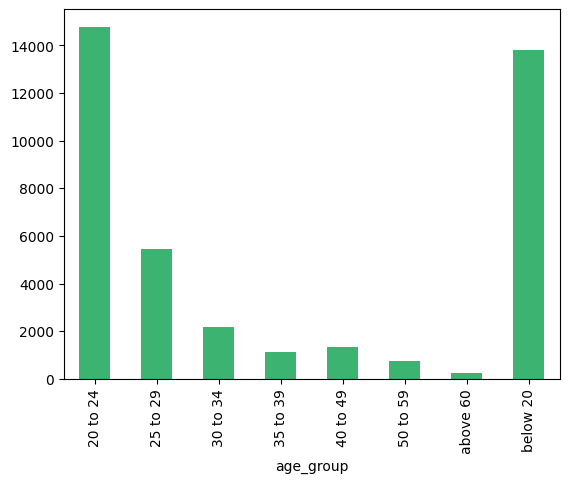

In [86]:
#Creating a bar plot to understand the participation of age groups in the survey

df_age = df_eda.sort_values('age_group')
plot_1 = df_age.groupby('age_group').size().plot(kind='bar',legend = "age_group", color = 'mediumseagreen')
plot_1.get_legend().remove()
plot_1

<Axes: xlabel='gender'>

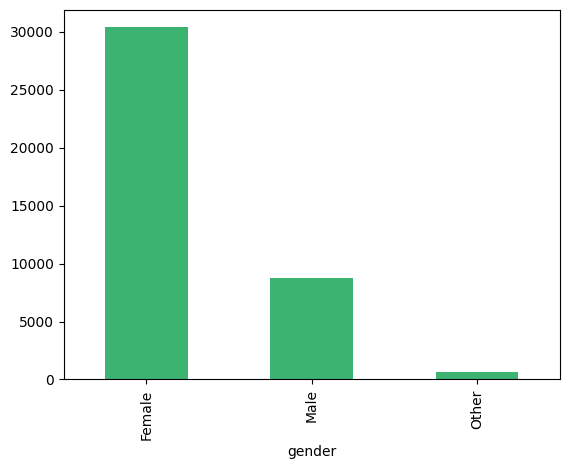

In [87]:
#Creating a bar plot to understand the participation of different genders in the survey

df_gender = df_eda.sort_values('gender')
plot_2 = df_gender.groupby('gender').size().plot(kind='bar',legend = "age_group", color = 'mediumseagreen')
plot_2.get_legend().remove()
plot_2

<Axes: xlabel='urbanicity'>

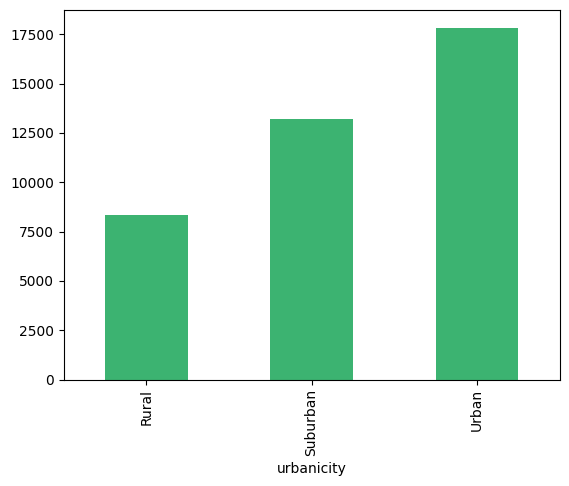

In [88]:
#Checking the variation of unbanicities in the survey
df_urban = df_eda[df_eda['urban'] != 0]
plot_3 = df_urban.groupby('urban').size().plot(kind='bar',legend = "urbanicity", color = 'mediumseagreen')
plt.xlabel('urbanicity', fontsize=10)
plot_3.get_legend().remove()
plot_3

<Axes: xlabel='education'>

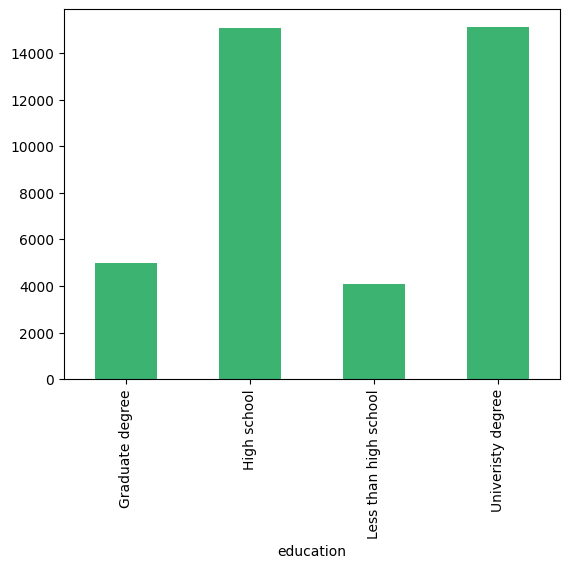

In [89]:
#df_urban = df_eda.sort_values('urban')
df_education = df_eda[df_eda['education'] != 0]
plot_4 = df_education.groupby('education').size().plot(kind='bar',legend = "education", color = 'mediumseagreen')
plot_4.get_legend().remove()
plot_4

FINDINGS:
1. People below 24 years of age had taken the survey more than old age groups
2. Females had taken up the survey more than males.
3. People were concentrated more from urban areas or cities followed by suburban in taking up the surveys
4. Most of the people who took survey were from high school and university degree.

In [90]:
#Correlation plot for understanding the correlation between variables and the correlation between variables and total score

def make_corr_map(df_eda, title, zmin=-1, zmax=1, height=600, width= 800):
    """
    data: Your dataframe.
    title: Title for the correlation matrix.
    zmin: Minimum number for color scale. (-1 to 1). Default = -1.
    zmax: Maximum number for color scale. (-1 to 1). Default = 1.
    height: Default = 600
    width: Default = 800
    """

    # Select only numeric columns before calculating correlation
    data = df_eda.select_dtypes(include=np.number).corr()
    mask = np.triu(np.ones_like(data, dtype=bool))
    rLT = data.mask(mask)

    heat = go.Heatmap(
        z = rLT,
        x = rLT.columns.values,
        y = rLT.columns.values,
        zmin = zmin,
            # Sets the lower bound of the color domain
        zmax = zmax,
            # Sets the upper bound of color domain
        xgap = 1, # Sets the horizontal gap (in pixels) between bricks
        ygap = 1,
        colorscale = 'RdBu'
    )

    title = title

    layout = go.Layout(
        title_text=title,
        title_x=0.5,
        width= width,
        height= height,
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        yaxis_autorange='reversed'
    )

    fig=go.Figure(data=[heat], layout=layout)
    return fig.show()

In [91]:
df_eda['score'] = df_eda.iloc[:, 0:42].sum(axis= 1)
df_eda['mean_score'] = df_eda['score'] / 42

make_corr_map(df_eda.iloc[:, 42:],
              'Correlation heatmap for DASS score and variables',
              zmax=0.8, zmin=-0.8,
              height= 900)

FINDINGS:
DASS scores seemed to be most correlated with TIPI4 (Anxious, easily upset) personalities, and most inversely correlated with TIPI9 (calm, emotionally stable) personalities.

Other higher correlated personality types are:

TIPI1 and TIPI5 (extraversion, openness to new experience)
TIPI1 and TIPI6 (extraversion, reserved quiet)
TIPI3 and TIPI9 (self-disciplined, emotionally stable)
TIPI5 and TIPI9 (openness to new experience, emotionally stable)
As expected, age is more strongly correlated with education, voted, and marriage.


To check if there is any connection between the responses, the positions and the time

In [92]:
#Checking for correlation between the response time for the survey questions with the position of the questions and the time at which the survey was taken

responses_col = []
response = []
position = []
time = []

for i in range(0, 42*3, 3):
    responses_col.append(df_dass.columns[i])

for i in range(0, 42*3, 3):
    response.append(df_dass[df_dass.columns[i]].mean())

for i in range(0, 42*3, 3):
    position.append(df_dass[df_dass.columns[i+1]].mean())

for i in range(0, 42*3, 3):
    time.append(df_dass[df_dass.columns[i+2]].mean())
Q_Details = pd.DataFrame({'Response':response, 'Position':position, 'Time':time}, index=range(1,43))
Q_Details.index.name = 'Question'

In [93]:
Q_Details.head(2)

,Response,Position,Time
Question,,,
1,2.619541,21.555754,6970.804692
2,2.172202,21.247228,5332.521484


<Axes: >

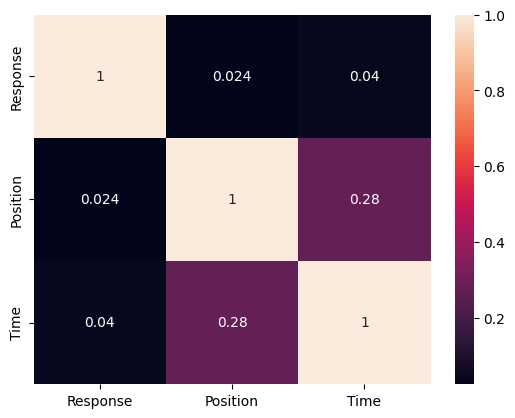

In [94]:
sns.heatmap(Q_Details.corr(),annot=True)

There seems to be somewhat correlation between Position and Time, but its low and negligible.

In [95]:
#Categorizing the questions from the DASS curvey into categories- Depression, Stress and Anxiety

DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}


DASS_scores = {'Depression': [(0, 10), (10, 14), (14, 21), (21, 28)],
             'Anxiety': [(0, 8), (8, 10), (10, 15), (15, 20)],
             'Stress': [(0, 15), (15, 19), (19, 26), (26, 34)]}

Categorizing each question by the given condition it is related to:

https://neurocogsystem.com/wp-content/uploads/2021/02/DASS-42-Scoring.pdf

In [96]:
df_conditions = {'Anxiety_A':[],'Anxiety_I':[],'Anxiety_E':[],
                 'Depression_A':[],'Depression_I':[],'Depression_E':[],
                 'Stress_A':[],'Stress_I':[],'Stress_E':[]}
for i in DASS_keys["Anxiety"]:
    df_conditions['Anxiety_A'].append('Q' + str(i) + 'A')
    df_conditions['Anxiety_I'].append('Q' + str(i) + 'I')
    df_conditions['Anxiety_E'].append('Q' + str(i) + 'E')

for i in DASS_keys["Depression"]:
    df_conditions['Depression_A'].append('Q' + str(i) + 'A')
    df_conditions['Depression_I'].append('Q' + str(i) + 'I')
    df_conditions['Depression_E'].append('Q' + str(i) + 'E')

for i in DASS_keys["Stress"]:
    df_conditions['Stress_A'].append('Q' + str(i) + 'A')
    df_conditions['Stress_I'].append('Q' + str(i) + 'I')
    df_conditions['Stress_E'].append('Q' + str(i) + 'E')

In [97]:
#Grouping all the survey questions into their categories
df_conditions = pd.DataFrame(df_conditions)
df_conditions

,Anxiety_A,Anxiety_I,Anxiety_E,Depression_A,Depression_I,Depression_E,Stress_A,Stress_I,Stress_E
0,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q1A,Q1I,Q1E
1,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E
2,Q7A,Q7I,Q7E,Q10A,Q10I,Q10E,Q8A,Q8I,Q8E
3,Q9A,Q9I,Q9E,Q13A,Q13I,Q13E,Q11A,Q11I,Q11E
4,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q12A,Q12I,Q12E
5,Q19A,Q19I,Q19E,Q17A,Q17I,Q17E,Q14A,Q14I,Q14E
6,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q18A,Q18I,Q18E
7,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q22A,Q22I,Q22E
8,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E
9,Q28A,Q28I,Q28E,Q31A,Q31I,Q31E,Q29A,Q29I,Q29E


In [98]:
#creating the total score from the survey questions
df_eda['total'] = np.sum(df_eda.iloc[:,0:42], axis=1)

Even though the number of female users taking the survey is very high the average DASS score is higher for the 'Other' category. This could be because of the low number of users in 'Other'

CREATING NEW DATAFRAMES FOR ANXIETY, DEPRESSION AND STRESS CONDITION BEFORE IMPLEMENTING MODELS

In [99]:
df_model = df_dass_filtered.copy()

In [100]:
new_data=df_model.iloc[:,42:]
data_3=df_model.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [101]:
#Scoring as per given answers for the respective set of Depression,Anxiety,Stress questions
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3)
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)

In [102]:
#After scoring is done combining these three sets back with the the rest of the table
#Therefore now have 3 dataframes to work with as of Depression,Anxiety,Stress

def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

In [103]:
depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


In [104]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
0,1,3,0,3,3,2,0,3,3,3,...,16,1,1,1,12,1,10,2,1,2
1,1,3,1,3,2,3,1,1,2,1,...,16,2,1,2,7,0,70,2,1,4
2,3,3,3,3,3,3,3,3,0,3,...,17,2,1,1,4,3,60,1,1,3
3,1,2,2,0,1,2,0,0,1,2,...,13,2,1,2,4,5,70,2,1,5
4,2,3,2,3,2,3,2,1,3,2,...,19,2,2,3,10,1,10,2,1,4


In [105]:
def condition(x):
    if x<=9:        #Normal
        return 1
    if  10<=x<=13:  #Mild
        return 2
    if 14<=x<=20:   #Moderate
        return 3
    if 21<=x<=27:   #Severe
        return 4
    if x>=28:       #Extremely Severe
        return 5

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,1,1,12,1,10,2,1,2,4
1,1,3,1,3,2,3,1,1,2,1,...,2,1,2,7,0,70,2,1,4,4
2,3,3,3,3,3,3,3,3,0,3,...,2,1,1,4,3,60,1,1,3,5
3,1,2,2,0,1,2,0,0,1,2,...,2,1,2,4,5,70,2,1,5,3
4,2,3,2,3,2,3,2,1,3,2,...,2,2,3,10,1,10,2,1,4,5


In [106]:
anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [107]:
Anxiety=pd.merge(anxiety,new_data,how='left',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
0,3,3,3,1,3,2,2,3,3,2,...,16,1,1,1,12,1,10,2,1,2
1,0,2,2,2,2,0,0,0,1,3,...,16,2,1,2,7,0,70,2,1,4
2,0,0,0,1,3,1,0,1,1,0,...,17,2,1,1,4,3,60,1,1,3
3,2,0,3,2,1,0,1,0,0,0,...,13,2,1,2,4,5,70,2,1,5
4,1,3,3,3,3,3,3,3,3,3,...,19,2,2,3,10,1,10,2,1,4


In [108]:
stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


In [109]:
Stress=pd.merge(stress,new_data,how='left',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
0,3,3,3,3,3,3,3,3,3,3,...,16,1,1,1,12,1,10,2,1,2
1,3,3,3,1,1,3,1,2,2,2,...,16,2,1,2,7,0,70,2,1,4
2,2,2,2,1,0,0,1,2,1,1,...,17,2,1,1,4,3,60,1,1,3
3,1,2,1,1,0,3,0,0,3,2,...,13,2,1,2,4,5,70,2,1,5
4,1,1,3,1,3,3,3,2,1,1,...,19,2,2,3,10,1,10,2,1,4


# EDA and Deep dive into depression


In [110]:
#Data encoding for the subsetted data for depression

data_encoding = {"education":{ 1:"Less than high school", 2 : "High school", 3:"Univeristy degree", 4 : "Graduate degree" },
                 "urban":{ 1 : "Rural", 2 : "Suburban", 3 : "Urban"},
                 "gender":{0: "Other", 1 : "Male", 2 : "Female", 3 : "Other"},
                 "engnat":{ 1 : "Yes", 2 : "No"},
                 "hand":{ 1 : "Right", 2 : "Left", 3 : "Both"},
                 "orientation":{0 : "Other", 1:"Heterosexual", 2 : "Bisexual", 3:"Homosexual", 4 : "Asexual", 5 : "Other" },
                 "race":{ 10 :"Asian", 20 : "Arab", 30 :"Black", 40 : "Indigenous Australian", 50 : "Native American", 60 : "White", 70 : "Other"},
                 "voted":{ 1 : "Yes", 2 : "No"},
                 "married":{ 1 : "Never married", 2 : "Currently married", 3 : "Previously married"},
                 "religion":{1: "Agnostic", 2: "Atheist", 3: "Buddhist", 4: "Christian(Catholic)", 5: "Christian(Mormon)", 6: "Christian(Protestant)", 7: "Christian(Other)", 8: "Hindu", 9: "Jewish", 10: "Muslim", 11: "Sikh", 12: "Other"}}


depression_eda = Depression
depression_eda = depression_eda.replace(data_encoding)
depression_eda.head()


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,1,Right,Other,Heterosexual,Asian,No,Never married,2,4
1,1,3,1,3,2,3,1,1,2,1,...,2,1,Left,Christian(Other),Other,Other,No,Never married,4,4
2,3,3,3,3,3,3,3,3,0,3,...,2,1,Right,Christian(Catholic),Homosexual,White,Yes,Never married,3,5
3,1,2,2,0,1,2,0,0,1,2,...,2,1,Left,Christian(Catholic),Other,Other,No,Never married,5,3
4,2,3,2,3,2,3,2,1,3,2,...,2,2,Both,Muslim,Heterosexual,Asian,No,Never married,4,5


<Axes: xlabel='religion', ylabel='Total_Count'>

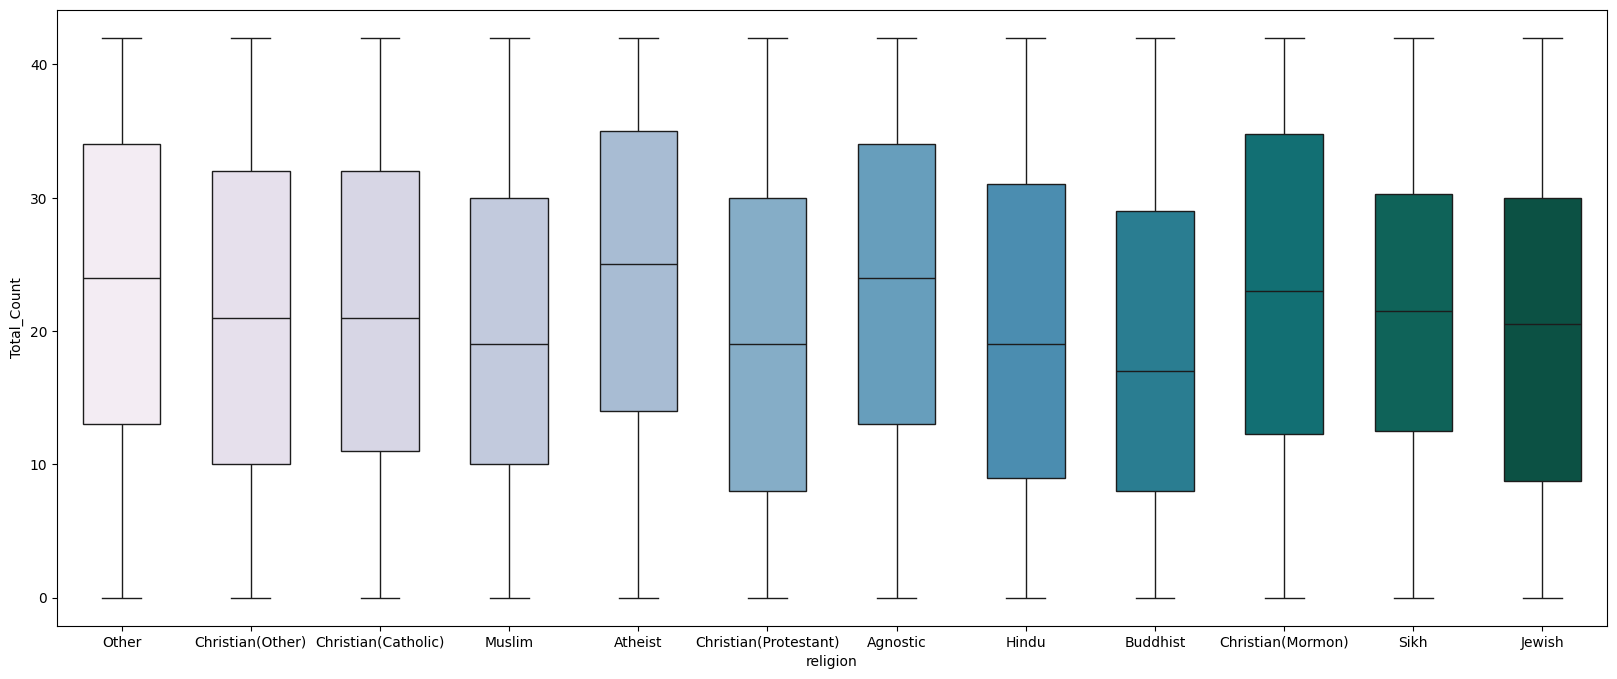

In [111]:
#Comparision of depression scores for religions

df_religion = depression_eda[depression_eda['religion'] != 0]
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plt.figure(figsize=(20,8))
sns.boxplot(x="religion", y="Total_Count", data=df_religion,
            whis=[0, 100], width=.6, palette="PuBuGn")



Buddhists had the lowest mean depression score followed by Christians (protestants) and Hindus

Atheists were on the higher end on the mean depression score

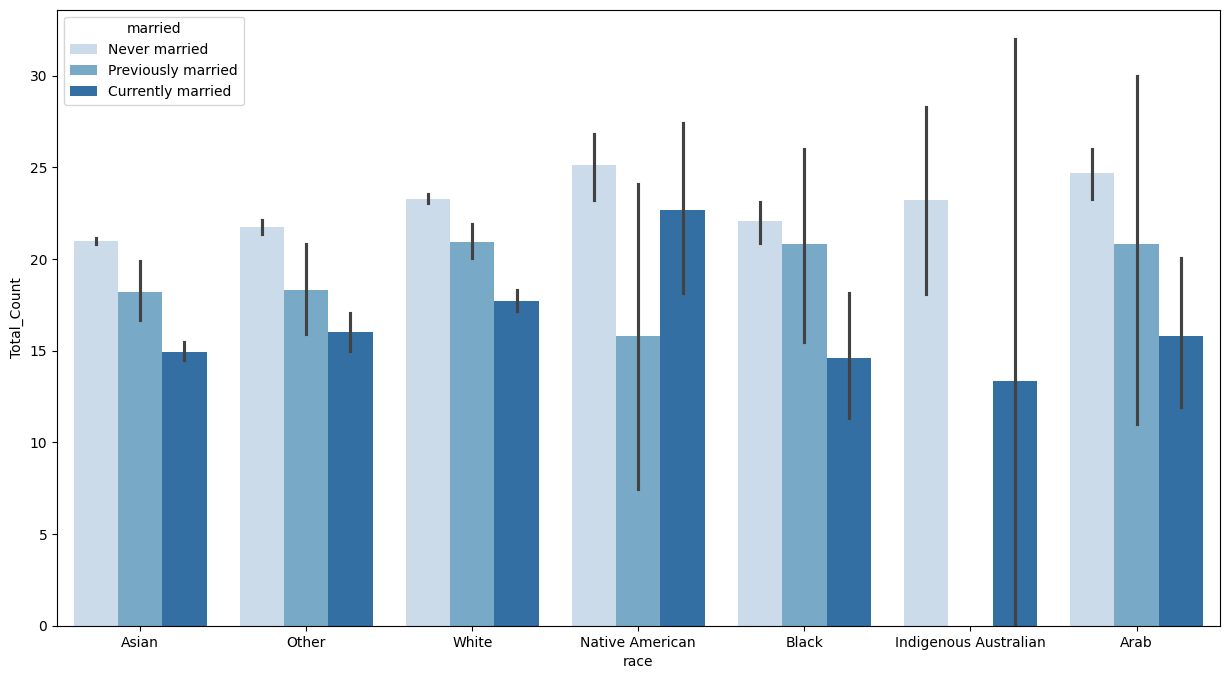

In [112]:
# Plotting the depression scores of race along with marital status

df_married = depression_eda[depression_eda['married'] != 0]
plt.figure(figsize=(15,8))
sns.barplot(x = 'race',
            y = 'Total_Count',
             hue = 'married',
            data = df_married,
            palette = "Blues")

# Show the plot
plt.show()

The highest average depression was observed among Native Americans and Arabs

Married people seemed to have lower levels of depression when compared to unmarried users

<Axes: xlabel='TIPI9', ylabel='Total_Count'>

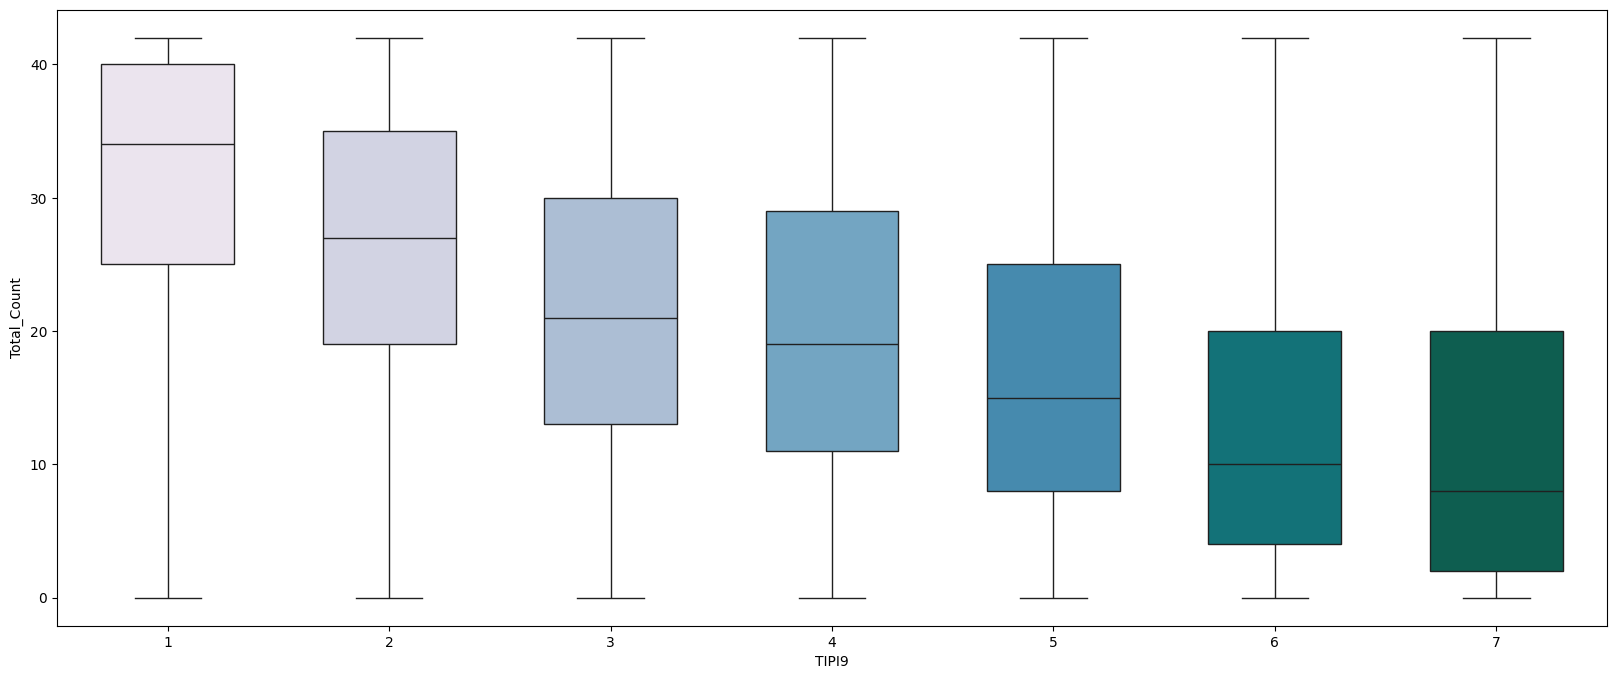

In [113]:
#Deep diving into TIPI9 as we saw a negative correlation between this personality trait and the score
depression_eda = depression_eda[depression_eda['TIPI9'] != 0]
plt.figure(figsize=(20,8))
sns.boxplot(x="TIPI9", y="Total_Count", data=depression_eda,
            whis=[0, 100], width=.6, palette="PuBuGn")

Users who classified themselves as TIPI9 has significantly lower depression scores

<Axes: xlabel='TIPI4', ylabel='Total_Count'>

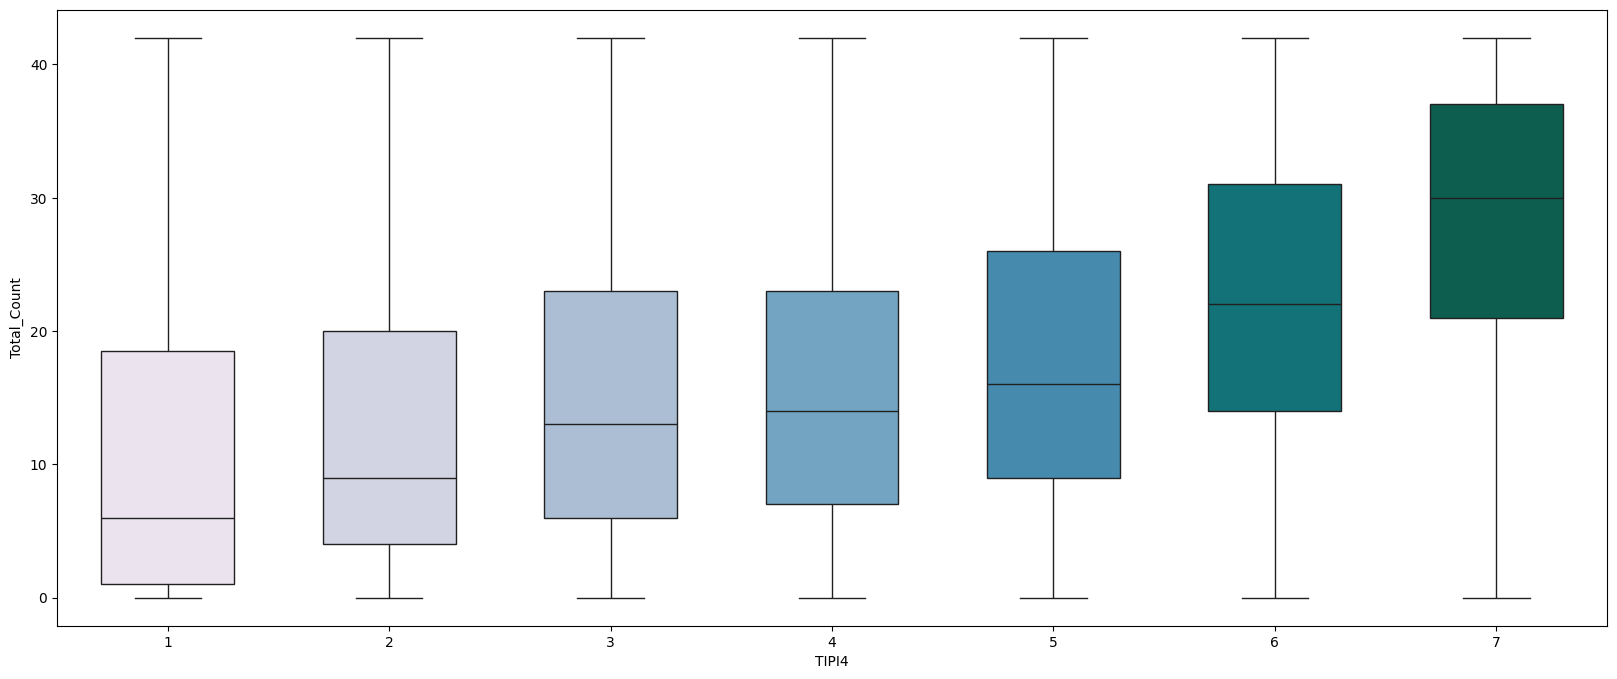

In [114]:
#Deep diving into TIPI4 as we saw a positive correlation between this personality trait and the score
depression_eda = depression_eda[depression_eda['TIPI4'] != 0]
plt.figure(figsize=(20,8))
sns.boxplot(x="TIPI4", y="Total_Count", data=depression_eda,
            whis=[0, 100], width=.6, palette="PuBuGn")

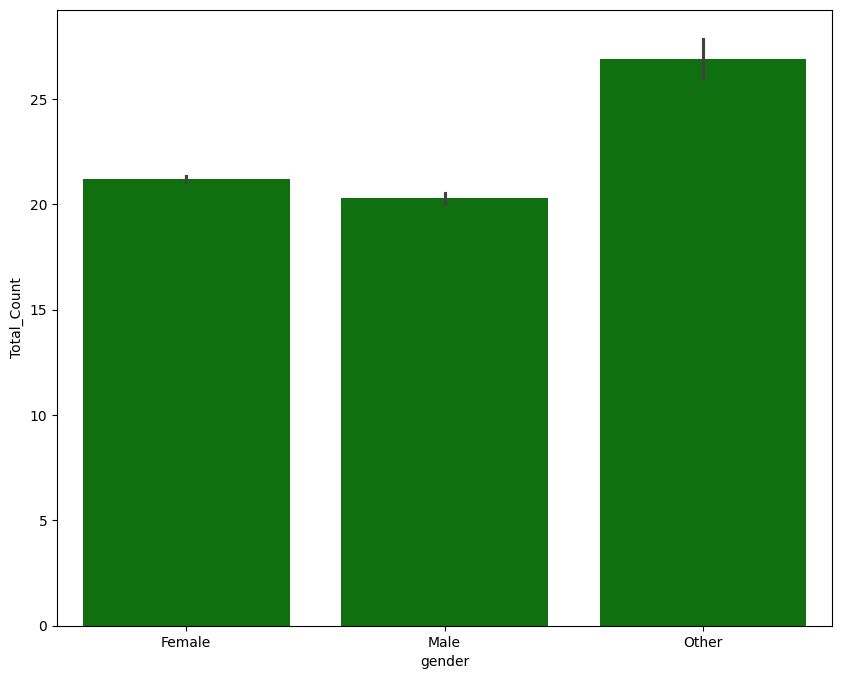

In [115]:
# Plotting the average DASS score across marital status
df_marriage = depression_eda[depression_eda['married'] != 0]
plt.figure(figsize=(10,8))
sns.barplot(x = 'gender',
            y = 'Total_Count',
            data = df_marriage,
            color = "green")

# Show the plot
plt.show()

Users who classified themselves as TIPI4 has higher mean depression scores for every score level

# LOGISTIC REGRESSION MODEL FOR DEPRESSION

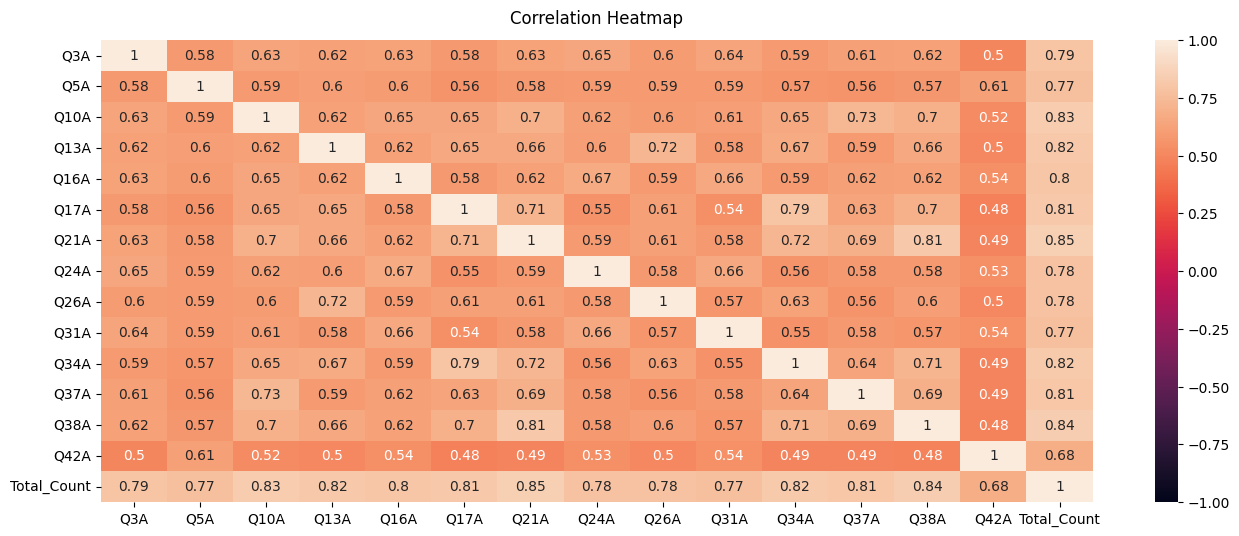

In [116]:
#Correlation plot to understand the correlation between the survey questions and the depression score
df_corr = depression.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [117]:
scaler = StandardScaler()
#Dropping top 2 the highly correlated variables Q38A and Q10A for better model performace
X=Depression[['Q3A', 'Q5A', 'Q10A','Q13A', 'Q16A', 'Q17A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q42A', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'age']]
y=Depression[['Condition']]
X = scaler.fit_transform(X)

# X_test_scaled = scaler.transform(X_test)

In [118]:
X.shape

(39773, 26)

## Dimensionality reduction

In [119]:
#Performing PCA for dimensionality reduction and better model performance
#The number of components is selected as 15

pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

#mds = MDS(n_components= 4)
#X_mds = mds.fit_transform(X)

In [120]:
#Splitting the data into training and testing datasets for data modelling
# The dataset has been split into 65% for training and 35% for testing
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.35,random_state=0)

In [121]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (25852, 15) (25852, 1)
Test Set: (13921, 15) (13921, 1)


Accuracy: 0.905
F1_Score: 0.903
Recall_Score: 0.905
Precision_Score: 0.903
Cross Validation Score: 0.905
              precision    recall  f1-score   support

           1     0.9339    0.9852    0.9589      3114
           2     0.8395    0.6875    0.7559      1347
           3     0.8428    0.8768    0.8595      2459
           4     0.8410    0.8293    0.8351      2220
           5     0.9616    0.9626    0.9621      4781

    accuracy                         0.9046     13921
   macro avg     0.8838    0.8683    0.8743     13921
weighted avg     0.9034    0.9046    0.9030     13921



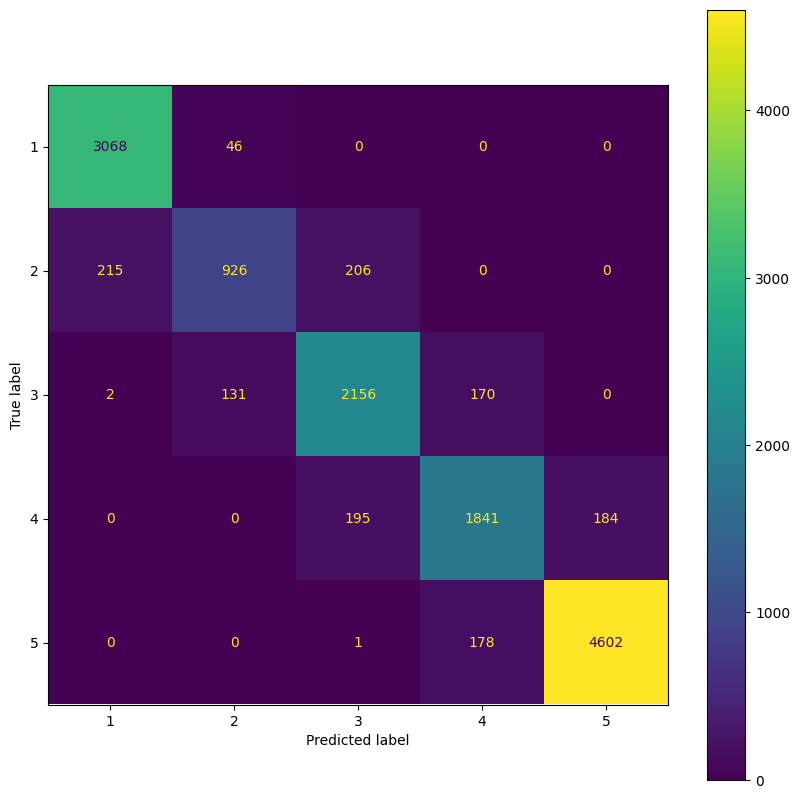

In [122]:
import warnings
warnings.filterwarnings('ignore')
#Defining and fitting the logistic regression model to the data

lr=LogisticRegression(solver='saga').fit(X_train,y_train.values.ravel())

#Calculating the accuracy metrics for the model

Acc_lr=round(accuracy_score(y_test,lr.predict(X_test)),3)
f1_lr=round(f1_score(y_test,lr.predict(X_test),average='weighted'),3)
recall_lr=round(recall_score(y_test,lr.predict(X_test),average='weighted'),3)
precision_lr=round(precision_score(y_test,lr.predict(X_test),average='weighted'),3)
print('Accuracy:',Acc_lr)
print('F1_Score:',f1_lr)
print('Recall_Score:',recall_lr)
print('Precision_Score:',precision_lr)

#Performing cross validation with 6 folds
print('Cross Validation Score:',round(np.mean(cross_val_score(lr, X_train, y_train.values.ravel(), cv = 6)),3))

#Creating the classification table based on the output
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=lr.predict(X_test))
print(classification)

#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(lr,X_test,y_test,ax=ax)

# RANDOM FOREST MODEL FOR DEPRESSION

Accuracy: 0.897
F1_Score: 0.896
Recall_Score: 0.897
Precision_Score: 0.897
Cross Validation Score: 0.899
              precision    recall  f1-score   support

           1     0.9435    0.9647    0.9540      3114
           2     0.8020    0.6615    0.7250      1347
           3     0.8216    0.8857    0.8524      2459
           4     0.8360    0.8243    0.8301      2220
           5     0.9593    0.9603    0.9598      4781

    accuracy                         0.8975     13921
   macro avg     0.8725    0.8593    0.8643     13921
weighted avg     0.8965    0.8975    0.8961     13921



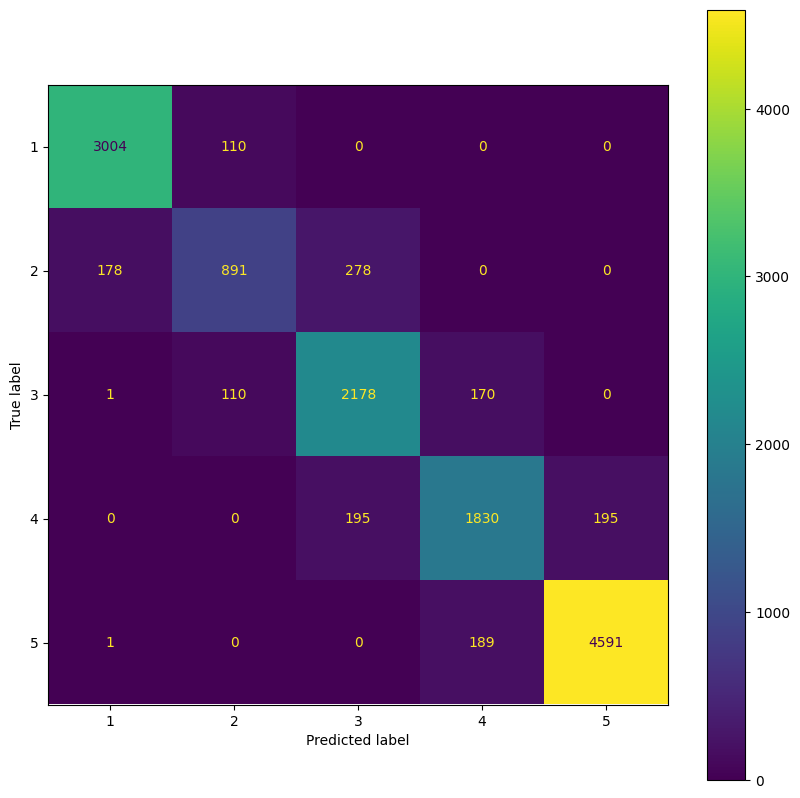

In [129]:
#Defining and fitting the Random Forest model to the data
# The number of estimators was taken as 190 along with other hyperparameters that were adjusted after trying multiple values for the best fit

RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='sqrt').fit(X_train,y_train.values.ravel())

#Calculating the accuracy metrics for the model

Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)

#Performing cross validation with 6 folds
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train, y_train.values.ravel(), cv = 6)),3))

#Creating the classification table based on the output
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test))
print(classification)

#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(RanFor,X_test,y_test,ax=ax)

# DECISION TREE MODEL FOR DEPRESSION

Accuracy: 0.863
F1_Score: 0.863
Recall_Score: 0.863
Precision_Score: 0.863
Cross Validation Score: 0.861
              precision    recall  f1-score   support

           1     0.9401    0.9483    0.9442      3114
           2     0.6969    0.6845    0.6906      1347
           3     0.7932    0.8015    0.7973      2459
           4     0.7584    0.7581    0.7583      2220
           5     0.9447    0.9391    0.9419      4781

    accuracy                         0.8634     13921
   macro avg     0.8267    0.8263    0.8265     13921
weighted avg     0.8632    0.8634    0.8633     13921



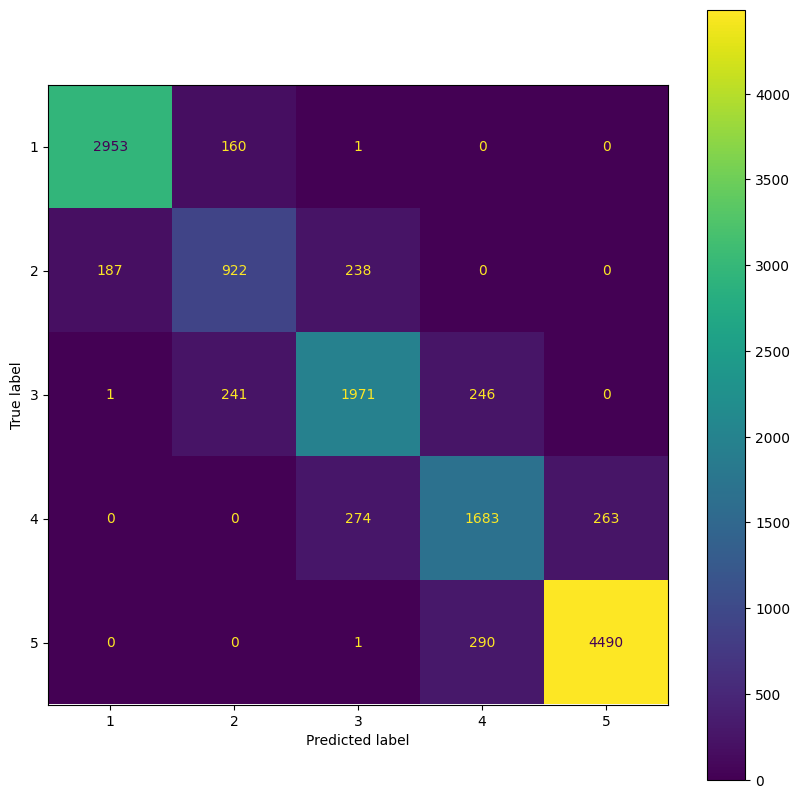

In [131]:
#Defining and fitting the Decision Tree model to the data
# The max depth was taken as 100 along with other hyperparameters that were adjusted after trying multiple values for the best fit

DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train,y_train)

#Calculating the accuracy metrics for the model
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)

#Performing cross validation with 6 folds
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train, y_train, cv = 6)),3))

#Creating the classification table based on the output
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test))
print(classification)

#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(DT,X_test,y_test,ax=ax)

# K Nearest Neighbours MODEL FOR DEPRESSION

Accuracy: 0.848
F1_Score: 0.842
Recall_Score: 0.848
Precision_Score: 0.842
Cross Validation Score: 0.846
              precision    recall  f1-score   support

           1     0.8804    0.9621    0.9194      3114
           2     0.6497    0.4269    0.5152      1347
           3     0.7471    0.8219    0.7827      2459
           4     0.7855    0.7541    0.7695      2220
           5     0.9471    0.9502    0.9486      4781

    accuracy                         0.8483     13921
   macro avg     0.8020    0.7830    0.7871     13921
weighted avg     0.8423    0.8483    0.8423     13921



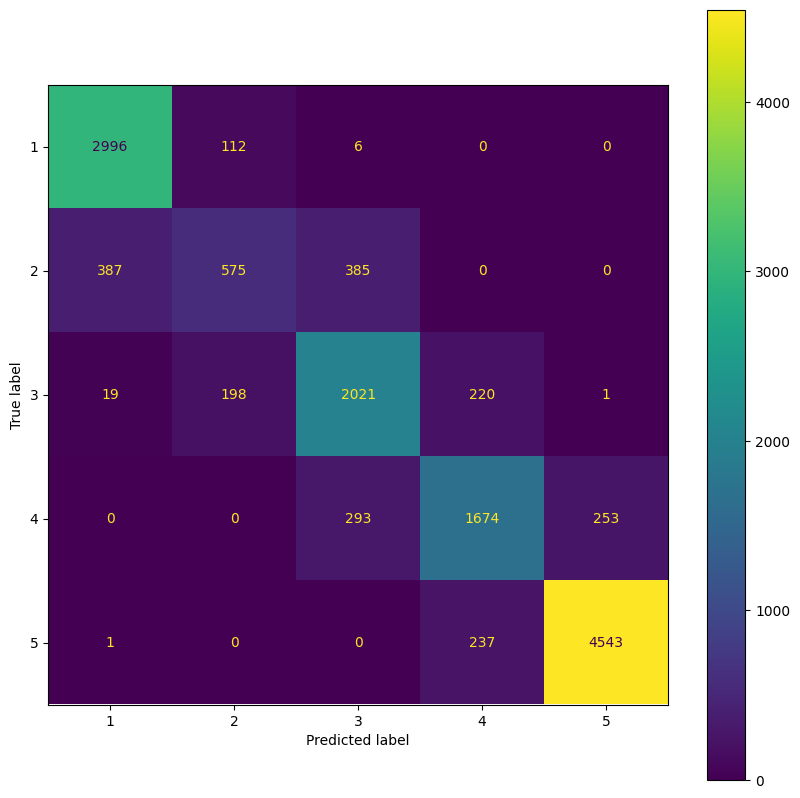

In [133]:
#Defining and fitting the Decision Tree model to the data
# The number of neighbors is taken as 15 after trying different values

knn=KNeighborsClassifier(n_neighbors=15).fit(X_train,y_train.values.ravel())

#Calculating the accuracy metrics for the model

Acc_knn=round(accuracy_score(y_test,knn.predict(X_test)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)

#Performing cross validation with 6 folds
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train, y_train.values.ravel(), cv = 6)),3))

#Creating the classification table based on the output
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test))
print(classification)

#Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test,ax=ax)

# BEST FIT MODEL COMPARISION

In [134]:
Results={
                  'Model':['Logistic-Regression', 'Random-Forest','Decision-Tree','K Nearest-Neighbors'],
                  'Accuracy(%)':[Acc_lr*100,Acc_ran*100,Acc_dt*100,Acc_knn*100],
                  'F1_Score(%)':[f1_lr*100,f1_ran*100,f1_dt*100,f1_knn*100],
                  'Precision(%)':[precision_lr*100,precision_ran*100,precision_dt*100,precision_knn*100],
                  'Recall(%)':[recall_lr*100,recall_ran*100,recall_dt*100,recall_knn*100]

                    }
Results_Depression=pd.DataFrame(Results)
Results_Depression

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Logistic-Regression,90.5,90.3,90.3,90.5
1,Random-Forest,89.7,89.6,89.7,89.7
2,Decision-Tree,86.3,86.3,86.3,86.3
3,K Nearest-Neighbors,84.8,84.2,84.2,84.8


### Pruning the decision tree model to increase accuracy

Text(0.5, 1.0, 'Total Impurity vs Alpha Effective')

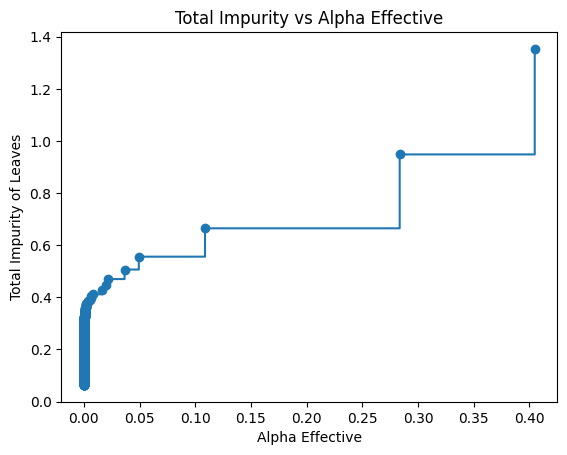

In [135]:
#plotting the cost complexity graph

path_DT = DT.cost_complexity_pruning_path(X_train, y_train)
Alphas, impurities = path_DT.ccp_alphas, path_DT.impurities
fig, ax = plt.subplots()
ax.plot(Alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Alpha Effective")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Alpha Effective")

In [136]:
#Pruning the decision tree
tree = DecisionTreeClassifier(ccp_alpha=0.0007,random_state=1)
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.8966037443911496 0.8877235830759285


#### The accuracy for the testing dataset increased from 86.1% to 88.79% with an alpha value of 0.0007 for the Decision tree model